In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
a = b = c = 0
def f1(x):
    '''Evaluates the objective function a|x-b| + c at x'''
    return a*np.abs(x-b) + c

def grad_f1(x):
    '''Evaluates the gradient of the objective at x '''
    return a*np.sign(x-b)

def err_plt(f, grad_f, x_i = 50, x_minimizer = b, alpha = 0.5, iterations=1000):
    '''
    Calculates and plots error of the gradient descent with a diminishing step size, for objective functions of the type f(x) =  a|x-b| + c
    f -> Returns value of function at x
    grad_f -> Returns gradient of function at x 
    x_minimizer -> minimizer of the objective f, default b because of nature of f
    alpha -> initial learning rate/step size (constant), default 0.1
    iterations -> Number of gradient iterations, default 10000
    x_i -> Starting point for descent, default 50
    '''
    y_val = [f(x_i)]#Array of function values
    x = x_i #Point at which the descent occurs
    err_val = [x_i - x_minimizer]#Error of the gradient step
    t_val = [0]#Step counter array
    
    #carrying out gradient step and filing the arrays
    for i in range(1,iterations):
        X = x - (alpha/np.sqrt(i))*grad_f(x)
        err = np.abs(X - x_minimizer)
        err_val.append(err)
        y_val.append(f(X))
        t_val.append(i)
        x = X
    
    #plotting
    ax = plt.subplot(2,1,1)
    ax.plot(t_val, err_val, label='Error')
    ax.set_xlabel("iterations Count")
    ax.set_ylabel("Error Function")
    ax.set_title("Error Plot")
    ax.legend()


    ax = plt.subplot(2,1,2)
    ax.plot(t_val, y_val, label='f(x)', color='green')
    ax.set_xlabel("iterations Count")
    ax.set_ylabel("Function value")
    
    ax.legend()
    
    plt.show()



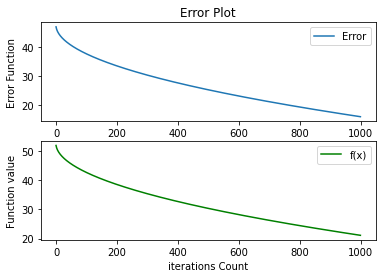

In [3]:
    
#a,b,c >0
a = 1
b = 3
c = 5


err_plt( f1, grad_f1, x_minimizer= b)

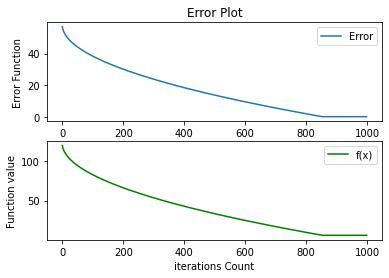

In [4]:
#a, c>0; b<0
a = 2
b = -7
c = 6


err_plt( f1, grad_f1, x_minimizer=b)

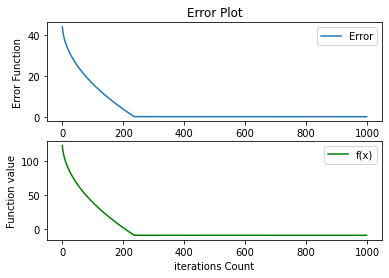

In [5]:
#a,b >0; c<0
a = 3
b = 6
c = -9
x_i = 50

err_plt( f1, grad_f1, x_minimizer=b)

## Question 2

In [6]:
def f2(x):
    ''''Evaluating the objective function at x'''
    return a*(x**2) + b*x + c

def grad_f2(x):
    '''Evaluating the gradient of the objective function at x'''
    return 2*a*x + b

def errf2(f, grad_f,x_i = 50, x_minimizer = -b/(2*a),d = [0.05, -0.5, 2.5] , iterations=50): 
    '''
    Calculates error function and gradient descent for a quadratic equation, as well as plotting the results for three cases -
    1. Converges from one side of the solutions
    2. Oscillates on both sides of the solution
    3. Diverges
    
    x_i -> Starting point for gradient descent
    f -> Quadratic function
    grad_f -> Gradient of f
    x_minimizer -> Minima of the quadratic, found via formula
    d1, d2, d3 -> various values of alpha to meet the above three conditions
    iterations -> Number of gradient iterations
    '''
    nature = ["Converging", "Oscillating", "Diverging"]

    for m,alpha in enumerate(d):
        x = x_i
        err_val = [x_i - x_minimizer]
        y_val = [f(x_i)]
        t_val = [0]

        for i in range(1,iterations):
            X = x*alpha
            err = np.abs(X - x_minimizer)
            err_val.append(err)
            y_val.append(f(X))
            t_val.append(i)
            x = X
        
        
        ax = plt.subplot(2,1,1)
        ax.set_title("Plots for "+ nature[m] +" alpha = {}".format(alpha))
        ax.plot(t_val, err_val, label='Error')
        ax.set_xlabel("iterations Count")
        ax.set_ylabel("Error Function")
        ax.legend()
        
        ax = plt.subplot(2,1,2)
        ax.plot(t_val, y_val, label='f(x)', color='green')
        ax.set_xlabel("iterations Count")
        ax.set_ylabel("Function value")
        ax.legend()
    
        plt.show()



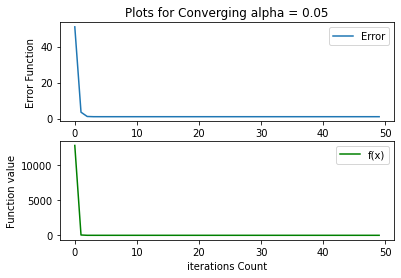

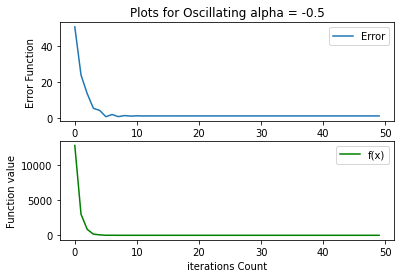

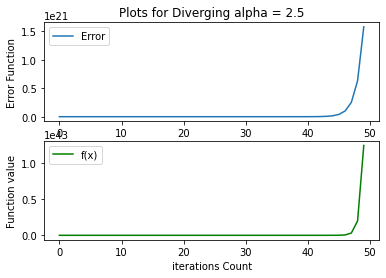

In [7]:
#Case 1
a = 5
b = 5
c = 5
errf2(f2, grad_f2)

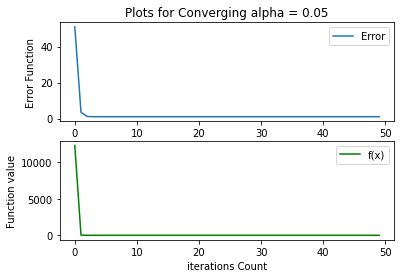

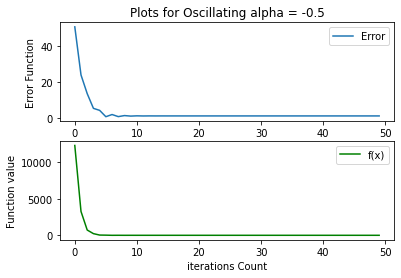

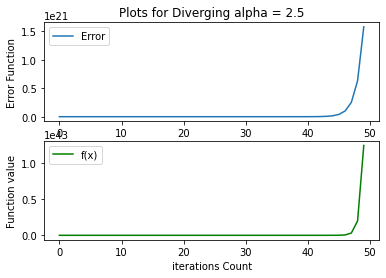

In [8]:
#Case 2
a = 5
b = -5
c = 5
errf2(f2, grad_f2)

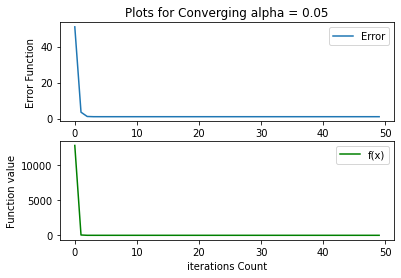

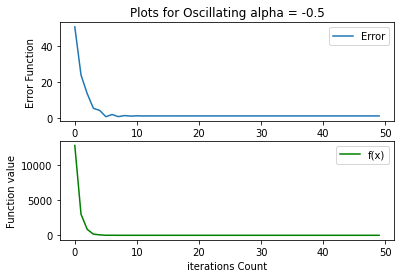

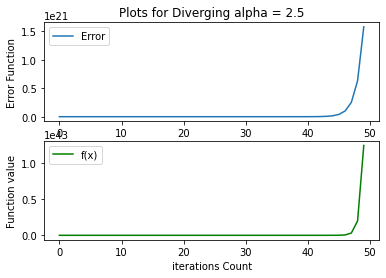

In [9]:
#Case 3
a = 5
b = 5
c = -5
errf2(f2, grad_f2)

## Question 3

#### The function has a global minima at x = -1.61409 and a local minima at x  = 1.23909. Thus, in the plots, I have chosen the minimizer from which error function is evaluated to be -1.61409, i.e global minima. To alter this as per requirements, please change the following cell

In [10]:
x_minlist = [-1.61049,-1.61409,-1.61409]#Minimizer x values for the cases [converge at local min, converge at global min, diverge]

In [11]:
def f3(x):
    ''''Evaluating the objective function at x'''
    return np.round(x**4,7) + np.round(0.5*x**3,7) - np.round(4*x**2,7) 

def grad_f3(x):
    '''Evaluating the gradient of the objective function at x'''
    return np.round(4*x**3,7) + np.round(1.5*x**2,7) - np.round(8*x,7)


def plot_error(f3, grad_f3, x_i = 2.3, x_minimizer = x_minlist, alpha = 0.05, b_val = [0.1,0.4,0.966], iterations = [100,100,20]):
    '''
    Carries out heavy ball momentum gradient descent and required plotting of the function values and error |xt - x*|
    f3 -> Objective evaluated at a point
    grad_f3 -> Gradient of objective evaluated at a point
    x_i -> Starting point for the descent
    x_minimiser -> x*, i.e the minima (by default, global minima, can be changed by altering x_minlist
    b_val -> List of beta values for the heavy ball momentum
    alpha -> learning rate
    iterations -> List of number of iterations for each of the three cases - local min convergence, global min convergence, divergence
    '''
    title = ["Convergence to Local Minima ", "Convergence to Global Minima ", "Divergence "]
    for j,beta in enumerate(b_val):
        x=x_i
        xstar=x_minimizer[j]
        err_list= np.zeros(iterations[j]+1)
        f_list=np.zeros(iterations[j]+1)
        err_list[0]=abs(x-xstar)
        f_list[0]=f3(x)
        xl=2
        for i in range(iterations[j]):
            xt=x
            x=x-alpha*grad_f3(x)+beta*(x-xl)
            xl=xt
            err_list[i+1]=abs(x-xstar)
            f_list[i+1]=f3(x)
        
        #Plotting
        print(title[j] + "with heavy ball momentum {}".format(beta))
        ax = plt.subplot(1,2,1)
        ax.plot(err_list, label='Error')
        ax.set_xlabel("Iteration Count")
        ax.legend()
        ax.set_title("Error")


        ax = plt.subplot(1,2,2)
        ax.plot( f_list, label='f(x)', color='green')
        ax.set_xlabel("Iteration Count")
        ax.legend()
        ax.set_title("Function value")
        plt.show()

Convergence to Local Minima with heavy ball momentum 0.1


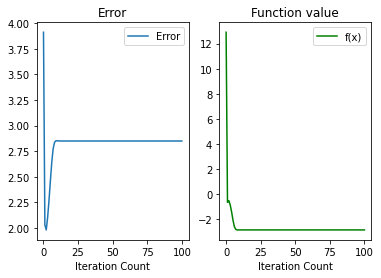

Convergence to Global Minima with heavy ball momentum 0.4


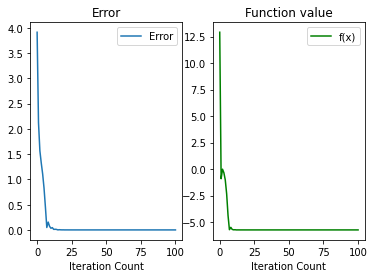

Divergence with heavy ball momentum 0.966


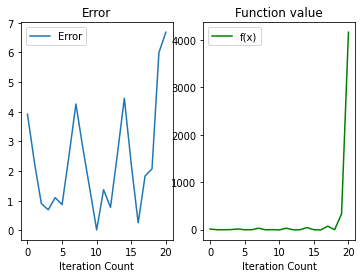

In [12]:
plot_error(f3, grad_f3)

## Question 4

In [13]:
def hess_f3(x):
    return np.round(12*x**2,7) + np.round(3*x,7) - np.round(8,7)

def plot_error4(f3, grad_f3, hess_f3,xi_list = [[5,1.23909],[-5,-1.614089]], iterations = 20):
    count = 0
    m = 0
    title = ["converging to local minima.", "converging to global minima."]
    for xi,xstar in xi_list:
        x=xi
        err_list=np.zeros(iterations+1)
        f_list=np.zeros(iterations+1)
        err_list[0]=abs(x-xstar)
        f_list[0]=f3(x)
    
       #Newton Step
        for i in range(iterations):
            x=x-grad_f3(x)/hess_f3(x)
            err_list[i+1]=abs(x-xstar)
            f_list[i+1]=f3(x)
    
        print("Starting point = "+ str(xi) + " and the function is {}".format(title[m]))
        
        plt.figure(count)
        plt.plot(f_list, label = 'f(x)')
        plt.ylim(-10,30)
        plt.plot(-2.83288*np.ones(iterations+1), alpha = 0.4,label = 'local min value')
        plt.plot(-5.73621*np.ones(iterations+1), alpha = 0.4,label = 'global min value')
        plt.title('Function value')
        plt.xlabel('Iteration Count')
        plt.legend(loc = 'upper right')
        plt.show()
    
        count +=1
        plt.figure(count)
        plt.plot(err_list, label = "Error", color = 'green')
        plt.plot(np.zeros(iterations +1), label = 'Zero line', alpha = 0.4)
        plt.title('Error value')
        plt.xlabel('Iteration Count')
        plt.legend()
        plt.show()
     
        count+=1
        rate_list = []
        t_list = []
        for i in range(1, len(err_list)):
            rate_list.append(err_list[i-1]/err_list[i]**2)
            t_list.append(i-1)
        plt.figure(count)
        plt.plot(t_list, rate_list, label = "Rate of Convergence", color = 'red')
        plt.xlabel("Iteration Count")
        plt.title("err(t)/err(t+1)^2")
        plt.legend()
        plt.show()
        
        count +=1
        m+=1

Starting point = 5 and the function is converging to local minima.


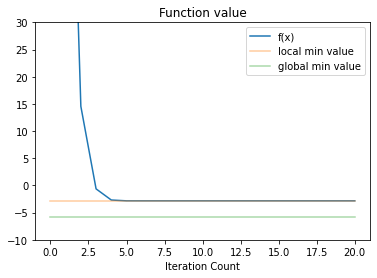

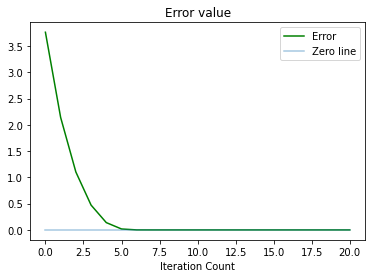

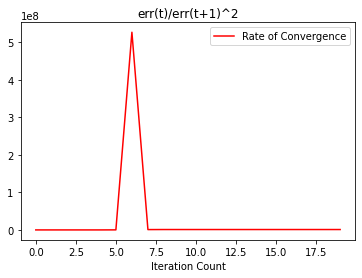

Starting point = -5 and the function is converging to global minima.


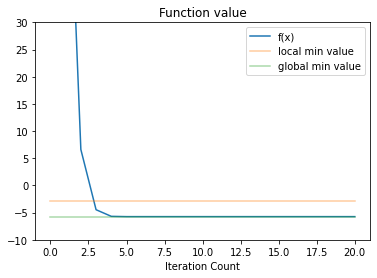

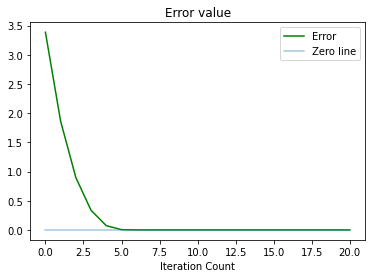

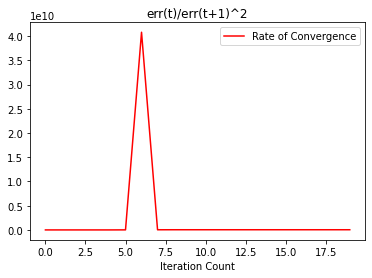

In [14]:
plot_error4(f3, grad_f3, hess_f3)